In [1]:
#import libraries
from pylab import *
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

QUESTION 1a

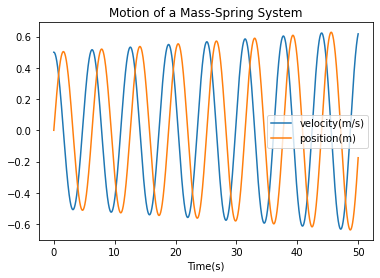

In [2]:
#define k, m and omega(w)
k = 1
m = 1
w = sqrt(k/m)

#create arrays for the numerical approximations of x, v, and a
an = zeros(5000) 
vn = zeros(5000)
xn = zeros(5000)

#declare time step and time array
dt = 0.01
t = arange(0,50,dt)

#store initial conditions
x0 = 0
v0 = .5

#set initial conditions
vn[0] = v0 
xn[0] = x0 

#integrate
for i in range(0,4999):   
    vn[i+1] = vn[i]-((k/m)*xn[i]*dt)
    xn[i+1] = xn[i] + vn[i]*dt
    
#plot results
plt.plot(t, vn, label = "velocity(m/s)"), plot(t, xn, label = "position(m)")
plt.title("Motion of a Mass-Spring System")
plt.xlabel("Time(s)")
plt.legend(loc = "best")

plt.savefig("1a.jpg")

QUESTION 1b

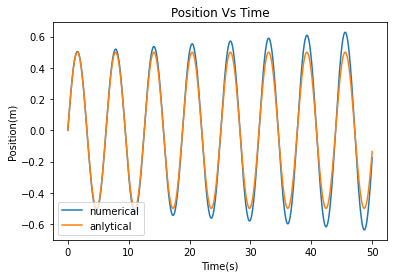

In [3]:
#define A and B values
A = x0
B = v0/w

#define equations of motion
xa = A*cos(w*t)+B*sin(w*t)
va = -A*w*sin(w*t) + B*w*cos(w*t)

#calculate analytic and numerical energies
En = (.5*k*xn**2)+(.5*m*vn**2)
Ea = (.5*k*xa**2)+(.5*m*va**2)

#plot positions
plt.plot(t, xn, label = "numerical"), plt.plot(t,xa, label = "anlytical")
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")
plt.title("Position Vs Time")
plt.legend(loc="lower left")

plt.savefig("1b XvsT.png")

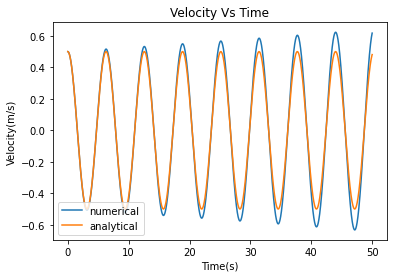

In [4]:
#plot velocities
plt.plot(t,vn, label = "numerical"), plt.plot(t,va, label = "analytical")
plt.xlabel("Time(s)")
plt.ylabel("Velocity(m/s)")
plt.title("Velocity Vs Time")
plt.legend(loc="lower left")

plt.savefig("1b VvsT.png")

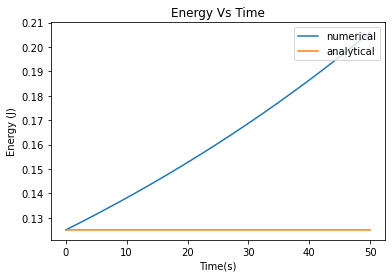

In [5]:
#plot energies
plt.plot(t,En, label = "numerical"), plt.plot(t,Ea, label = "analytical")
plt.xlabel("Time(s)")
plt.ylabel("Energy (J)")
plt.title("Energy Vs Time")
plt.legend(loc="upper right")

plt.savefig("1b EvsT.png")

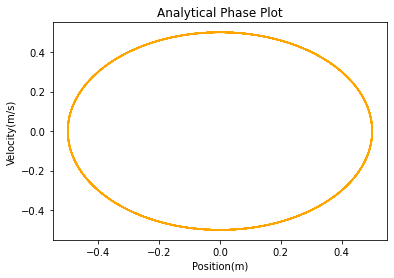

In [6]:
#plot analytic phase space
plt.plot(xa,va, color = "orange")
plt.xlabel("Position(m)")
plt.ylabel("Velocity(m/s)")
plt.title("Analytical Phase Plot")

plt.savefig("1b Analytic Phase.png")

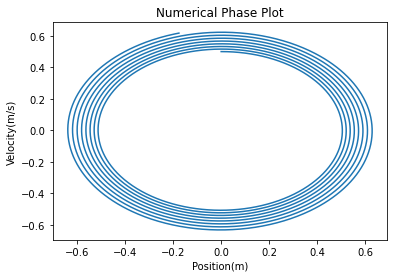

In [7]:
#plot numerical phase space
plt.plot(xn, vn)
plt.xlabel("Position(m)")
plt.ylabel("Velocity(m/s)")
plt.title("Numerical Phase Plot")

plt.savefig("Numerical Phase.png")

QUESTION 1c

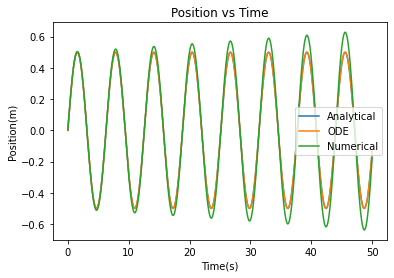

In [9]:
#deine a function to integrage
def xdot(x,t):  
    return -A*w*sin(w*t)+B*w*cos(w*t)

#solve for position
position = odeint(xdot, x0, t)

#plot numerical, analytic and odeint results
plt.plot(t, xa, label = "Analytical"),plt.plot(t, position, label = "ODE"), plt.plot(t,xn, label = "Numerical")
plt.title("Position vs Time")
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")
plt.legend(loc = "best")

plt.savefig("1c XvsT.png")

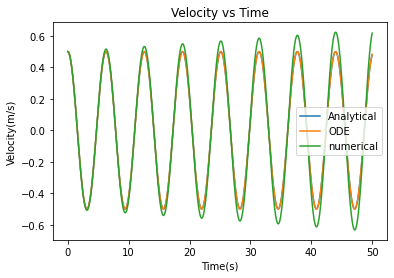

In [10]:
#define vdot function
def vdot(x, t):  
    return -(w**2)*(A*cos(w*t)+B*sin(w*t))

#solve for velocity
velocity = odeint(vdot, v0, t)

#plot results
plt.plot(t, va, label = "Analytical"), plt.plot(t, velocity, label = "ODE"),plt.plot(t, vn, label = "numerical")
plt.title("Velocity vs Time")
plt.xlabel("Time(s)")
plt.ylabel("Velocity(m/s)")
plt.legend(loc="best")

plt.savefig("1c VvsT.png")

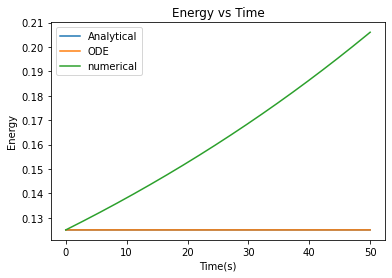

In [11]:
#calculate energy from odeint
E_ode = (.5*k*position**2)+(.5*m*velocity**2)

#plot results
plt.plot(t, Ea,label="Analytical"),plt.plot(t,E_ode, label = "ODE"),  plt.plot(t,En,label="numerical")
plt.title("Energy vs Time")
plt.xlabel("Time(s)")
plt.ylabel("Energy")
plt.legend(loc = "upper left")

plt.savefig("1c EvsT.png")